In [133]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import keras
from PIL import ImageOps,Image
import os
import cv2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
def mask_creator(img):
  
  equ = cv2.equalizeHist(img)  # histogram equalisation
  thresh1, bw1 = cv2.threshold(equ, thresh=240, maxval=255, type=cv2.THRESH_BINARY) # manually selected threshold, low values to 255
  
  """plt.figure(figsize=(16, 12))
  plt.subplot(2,2,1)
  plt.imshow(bw1,cmap="gray")
  plt.title("close & erosion2")
  plt.subplot(2,2,2)
  plt.imshow(img,cmap="gray")
  plt.title("real image")"""
  return bw1


In [61]:
def mask_creator_random(img):
  
  equ = cv2.equalizeHist(img)  # histogram equalisation
  thresh1, bw2 = cv2.threshold(equ, thresh=0, maxval=0, type=cv2.THRESH_BINARY_INV) # manually selected threshold, low values to 255
  
  """plt.figure(figsize=(16, 12))
  plt.subplot(2,2,1)
  plt.imshow(bw1,cmap="gray")
  plt.title("close & erosion2")
  plt.subplot(2,2,2)
  plt.imshow(img,cmap="gray")
  plt.title("real image")"""
  return bw2

In [55]:
test = cv2.imread("/content/drive/MyDrive/hackerman/train_image/train_image/random/DSCN0119_C-Copy.jpg", 0)
equ = cv2.equalizeHist(test)  # histogram equalisation
thresh1, bw6 = cv2.threshold(equ, thresh=0, maxval=0, type=cv2.THRESH_BINARY_INV) # manually selected threshold, low values to 255
test = np.array(test)
print(np.shape(bw6))

(275, 526)


In [ ]:
count = 0
dir = "/content/drive/MyDrive/hackerman/train_image/train_image"
for path in os.listdir(dir):
    full_path = os.path.join(dir, path)
    if os.path.isfile(full_path):
        path_l = "/content/drive/MyDrive/hackerman/train_mask/train_mask/"+path
        train = cv2.imread(full_path, 0)  # read in as a greyscale image, alternative to line 1 and 4 combined
        mask = mask_creator(train)
        if mask is None:
          pass
        else:
          cv2.imwrite(path_l,mask)
          print(np.shape(mask))
          count = count +1
          print(count)


In [ ]:
count = 0
dir = "/content/drive/MyDrive/hackerman/train_image/train_image/random"
for path in os.listdir(dir):
    full_path = os.path.join(dir, path)
    if os.path.isfile(full_path):
        path_l = "/content/drive/MyDrive/hackerman/train_mask/train_mask/"+path
        train = cv2.imread(full_path, 0)  # read in as a greyscale image, alternative to line 1 and 4 combined
        mask = mask_creator_random_shit(train)
        if mask is None:
          pass
        else:
          cv2.imwrite(path_l,mask)
          print(np.shape(mask))
          count = count +1
          print(count)

In [94]:
count = 0
dir_test = "/content/drive/MyDrive/hackerman/test_image/test_image"
for path_test in os.listdir(dir_test):
    full_path_test = os.path.join(dir_test, path_test)
    if os.path.isfile(full_path_test):
        path_l_test = "/content/drive/MyDrive/hackerman/test_mask/test_mask/"+path_test
        test = cv2.imread(full_path_test, 0)  # read in as a greyscale image, alternative to line 1 and 4 combined
        mask_test = mask_creator(test)
        cv2.imwrite(path_l_test,mask_test)
        count = count+1
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
count = 0
dir_val = "/content/drive/MyDrive/hackerman/val_image/val_image"
for path_val in os.listdir(dir_val):
    full_path_val = os.path.join(dir_val, path_val)
    if os.path.isfile(full_path_val):
        path_l_val = "/content/drive/MyDrive/hackerman/val_mask/val_mask/"+path_val
        val = cv2.imread(full_path_val, 0)  # read in as a greyscale image, alternative to line 1 and 4 combined
        mask_val = mask_creator(val)
        cv2.imwrite(path_l_val,mask_val)
        count = count+1
        print (count)

In [90]:
#For locating files for DataGenerator Method
dg_img_location = "/content/drive/MyDrive/hackerman/train_image"                      # Acces files for training
dg_mask_location = "/content/drive/MyDrive/hackerman/train_mask"

dg_test_img_location = "/content/drive/MyDrive/hackerman/test_image"            # Acces files for testing
dg_test_mask_location = "/content/drive/MyDrive/hackerman/test_mask"

dg_val_img_location = "/content/drive/MyDrive/hackerman/val_image"              # Acess files for validation
dg_val_mask_location = "/content/drive/MyDrive/hackerman/val_mask"

Batch_size = 30                                                                   #batch size of training data
size_x = 640                                                                      # sizes of input images
size_y = 352

In [95]:
def mask_preprocessing(mask):
              
              mask = tf.keras.preprocessing.image.array_to_img(mask)              #convert array type to PIL type
              mask = mask.point(lambda p: p > 10 and 1)                           # thresholding image { If any thing greater than 10 make it 1}
              mask = tf.keras.preprocessing.image.img_to_array(mask)              # PIL --> array
              mask = tf.convert_to_tensor(mask, dtype=np.float32)                 # convert to Tensor object
              return mask   

In [96]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_std_normalization=True)
mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function= mask_preprocessing)


image_generator = image_datagen.flow_from_directory(directory=dg_img_location                                           
                                                    , target_size=(size_x,size_y)
                                                    , seed=42  
                                                    , class_mode=None                                           
                                                    , classes=None
                                                    , batch_size=Batch_size)
mask_generator = mask_datagen.flow_from_directory(directory=dg_mask_location
                                                  ,target_size=(size_x,size_y)
                                                  , color_mode="grayscale"
                                                  , seed=42
                                                  , class_mode=None
                                                  , classes=None
                                                  , batch_size=Batch_size)

train_generator = zip(image_generator, mask_generator)                              # Zip it to create a stack having images and labels


test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_std_normalization=True).flow_from_directory(directory=dg_test_img_location
                                                           , target_size=(size_x,size_y)
                                                           , seed=42
                                                           ,class_mode=None
                                                           ,classes=None
                                                           , batch_size=Batch_size)
test_mask_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function= mask_preprocessing).flow_from_directory(directory=dg_test_mask_location
                                                                    ,target_size=(size_x,size_y)
                                                                    ,color_mode="grayscale"                 #to get mask image in greyscale (x,y,1)
                                                                    , seed=42
                                                                    ,class_mode=None
                                                                    , classes=None
                                                                    , batch_size=Batch_size)

test_generator      = zip(test_image_generator, test_mask_generator)

val_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= mask_preprocessing) 


val_image_generator = val_image_datagen.flow_from_directory(directory=dg_val_img_location
                                                            , target_size=(size_x,size_y)
                                                            , class_mode=None
                                                            , seed = 42
                                                            , classes=None
                                                            , shuffle=False)
val_mask_generator = val_mask_datagen.flow_from_directory(directory=dg_val_mask_location
                                                          ,target_size=(size_x,size_y)
                                                          , class_mode=None
                                                          , seed =42
                                                          , classes=None                                    #No greyscale image required since not converted to mask
                                                          , shuffle= False)                                 # we don't need to shuffle data here

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 475 images belonging to 1 classes.
Found 475 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 15 images belonging to 1 classes.


In [81]:
print(np.shape(mask_generator.next().astype(np.uint8)))       # Since generated data is not being stored this is used for troubleshooting

(30, 640, 352, 1)


In [ ]:
# This function is used to print first 10 images used for training
# first time you call this function you may get only 8 and second time you will get 10
def display(images_arr):                                                   
  fig, axes = plt.subplots(1, 10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img, cmap="gray")
    ax.axis('off')
  plt.tight_layout()
  plt.show()

display(image_generator.next().astype(np.uint8))

In [ ]:
# This is more practical it calls only the desired image and mask from test and training dataset
plt.imshow(image_generator.next().astype(np.uint8)[0], cmap="gray")
plt.show()
plt.imshow(np.squeeze(mask_generator.next().astype(np.uint8)[0]), cmap="gray")
plt.show()
plt.imshow(test_image_generator.next().astype(np.uint8)[0],cmap="gray")
plt.show()
plt.imshow(np.squeeze(test_mask_generator.next().astype(np.uint8)[0]), cmap="gray")
plt.show()

In [97]:
#We are using VGG16 as downsampler without training it and not including its dense layer neither its top layer
base_model = keras.applications.VGG16(weights="imagenet",include_top=False,input_shape=[size_x,size_y,3])

layer_names = [
    'block1_pool',         #640x368x64
    'block2_pool',         #320x184x128
    'block3_pool',         #160x92x256
    'block4_pool',         #80x46x512
    'block5_pool',         #40x23x512
]
layers = [base_model.get_layer(name).output for name in layer_names]          # Calling layers using list comprehension to make code cleaner

down_stack = tf.keras.Model(inputs = base_model.input, outputs = layers)      # Creating the downsampler model

down_stack.trainable = False                                                  # Thou shall not be trained

#base_model.summary()

In [98]:
#We are using parts of pix2pix as our upsampler. Here we are defining our upsampler layer that we will be calling in next cell layer. 
#To keep the code nice and clear!!!!
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()                                          # Adding Layers
  result.add(                                                             
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,             # Conv2dTranspose is exactly opposite of conv2d
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())                        #Normalization is included to avoid overfitting and less data is required

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.8))                          #Can be tweeked to increase performance 

  result.add(tf.keras.layers.ReLU())                                    #Relu layer is added as suggested in paper (Please refer report)

  return result

In [99]:
#Note that same number of filters are used here as in downsampler its increment rate and decrement rates are same, Well that makes it U-net!!!!
up_stack = [
    upsample(512,3),        #40x23
    upsample(256,3),        #80x46
    upsample(128,3),        #160x92
    upsample(64,3),         #320x184
]


In [100]:
def unet_model(output_channels):
    
    inputs = tf.keras.layers.Input(shape=[size_x,size_y,3])
    x = inputs                                                  # Defining Input shape

    skips = down_stack(x)                                       # Calling downsampler
    x = skips[-1]     
    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):                       # this for loop is called to concatenate the layers in both parts
        x = up(x)
        concat = tf.keras.layers.Concatenate()                  # function to concatenate layer (To check which layers are being concatenated check report)
        x = concat([x, skip])

    last = tf.keras.layers.Conv2DTranspose(output_channels, 2           #Defining the last layer activation is SIGMOID because we use BinaryCrossentropy
                                           ,strides=2, padding='same'   # Function of stride is to skip pixels in order to make learning fast
                                           , activation='sigmoid')      # Changing this will also change size and channels of image that is undesirable

    x = last(x)

    return tf.keras.Model(inputs = inputs, outputs = x)

In [86]:
#LEARNING RATE can be tweeked to improve performance
#Metrics define what parameters we need in output to get the output of the model
model = unet_model(1)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss= tf.keras.losses.BinaryCrossentropy(from_logits=True) , 
              metrics = ['accuracy','Precision','Recall'])

In [101]:
# Number of epochs is decided by looking at the graphs below
# steps_per_epoch = int(number of training image/batch size) didn't defined it in that way because want to experiment violeting that rule
# validation_steps = int(test image/ batch size) well can not make it zero!!!

period_of_time_defined_by_event = 5
model_history = model.fit(train_generator, epochs=period_of_time_defined_by_event, validation_data = test_generator, steps_per_epoch = 16, validation_steps=4)

Epoch 1/5
16/16 [==============================] - 26s 2s/step - loss: 0.2608 - accuracy: 0.9862 - precision: 0.4057 - recall: 8.1261e-04 - val_loss: 1.0153 - val_accuracy: 0.9377 - val_precision: 0.1294 - val_recall: 0.0173
Epoch 2/5
16/16 [==============================] - 26s 2s/step - loss: 0.2039 - accuracy: 0.9855 - precision: 0.1036 - recall: 0.0067 - val_loss: 0.6462 - val_accuracy: 0.9434 - val_precision: 0.5175 - val_recall: 0.0013
Epoch 3/5
16/16 [==============================] - 26s 2s/step - loss: 0.1263 - accuracy: 0.9859 - precision: 0.1816 - recall: 0.0067 - val_loss: 0.3295 - val_accuracy: 0.9383 - val_precision: 0.2874 - val_recall: 0.0598
Epoch 4/5
16/16 [==============================] - 26s 2s/step - loss: 0.0724 - accuracy: 0.9853 - precision: 0.2827 - recall: 0.0403 - val_loss: 0.1890 - val_accuracy: 0.9414 - val_precision: 0.4347 - val_recall: 0.1123
Epoch 5/5
16/16 [==============================] - 26s 2s/step - loss: 0.0587 - accuracy: 0.9854 - precision: 0.

1/1 [==============================] - 2s 2s/step


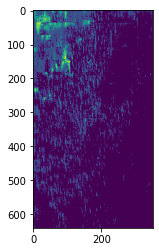

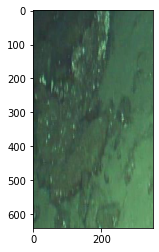

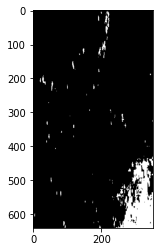

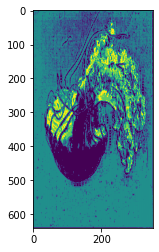

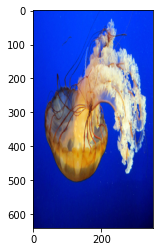

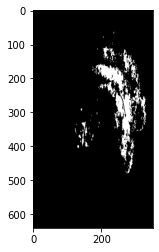

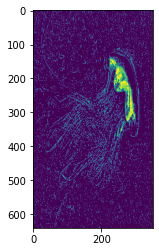

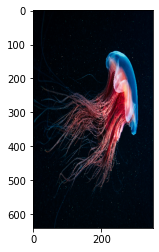

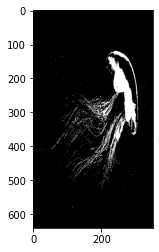

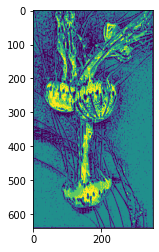

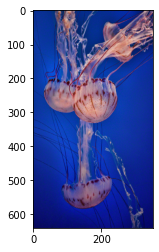

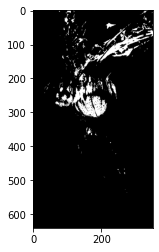

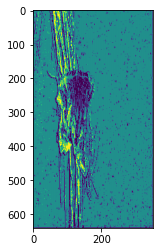

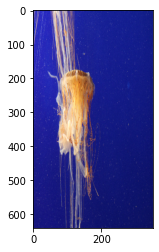

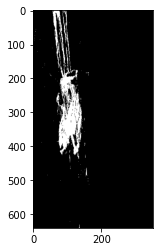

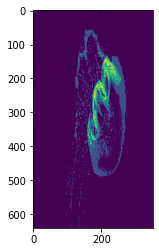

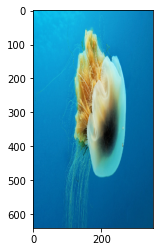

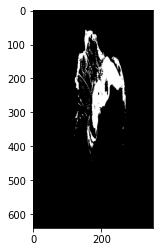

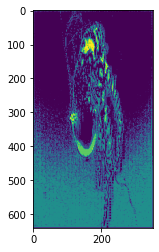

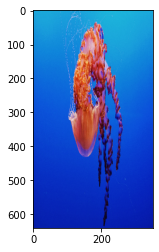

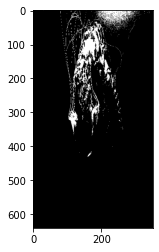

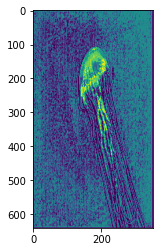

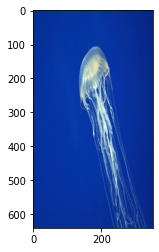

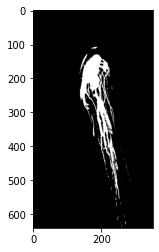

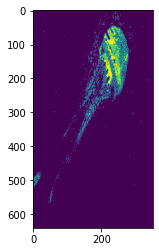

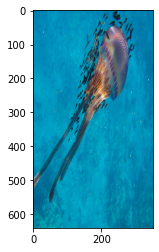

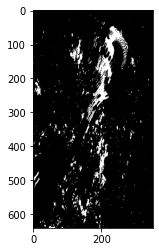

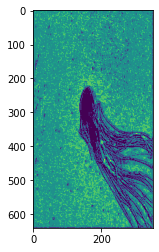

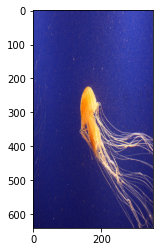

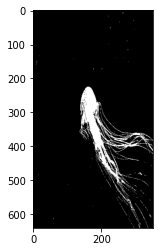

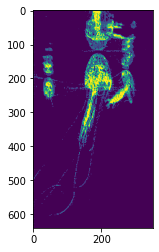

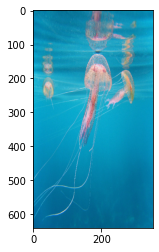

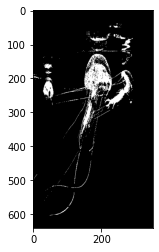

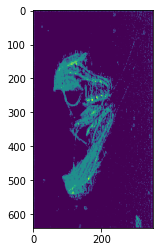

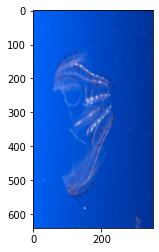

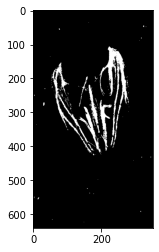

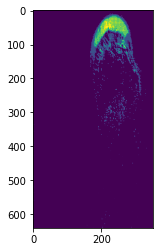

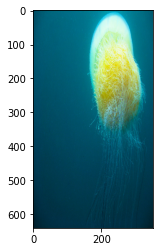

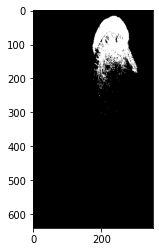

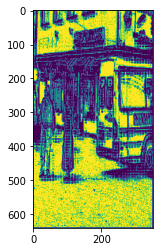

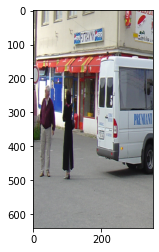

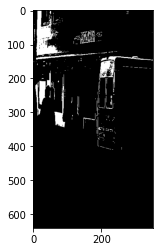

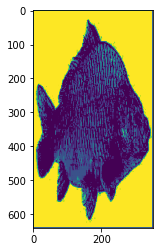

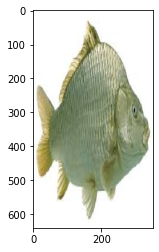

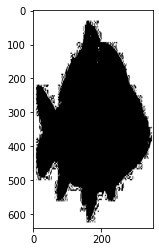

In [132]:
pred_mask = model.predict(val_image_generator, verbose=1)                        # prediction using that model


for i in range(15):

  plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[i]))              # show mask of predicted image looks cool in gray!!!
  plt.show()


  plt.imshow(val_image_generator.next().astype(np.uint8)[i])                       # Show validation image
  plt.show()

                                     
  plt.imshow(val_mask_generator.next().astype(np.uint8)[i]*255)       # Show validation mask
  plt.show()


In [ ]:
import pyttsx3
engine = pyttsx3.init()
engine.say("jellyfish at 10 meteres")
engine.runAndWait()

rate = engine.getProperty('rate')   # getting details of current speaking rate
#print (rate)                        #printing current voice rate
engine.setProperty('rate', 110)

volume = engine.getProperty('volume')   #getting to know current volume level (min=0 and max=1)
#print (volume)                          #printing current volume level
engine.setProperty('volume',4.5)